100%|██████████| 1/1 [40:03<00:00, 2403.25s/it]


Steady State
13165
13041
13115
12768
13139
12873
12883
13200
12647
13318


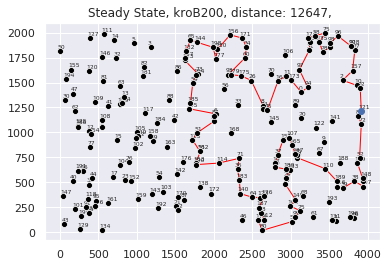

,strategy,instance,cost,time
0,Steady State,kroB200,13165,240.023783
0,Steady State,kroB200,13041,240.104805
0,Steady State,kroB200,13115,240.367193
0,Steady State,kroB200,12768,240.061709
0,Steady State,kroB200,13139,240.095275
0,Steady State,kroB200,12873,240.016950
0,Steady State,kroB200,12883,240.195633
0,Steady State,kroB200,13200,240.139433
0,Steady State,kroB200,12647,240.172528
0,Steady State,kroB200,13318,240.222769


In [19]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from strategies.steady_state.steady_state import SteadyState
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in tqdm(['kroB200']):
    instance = Instance(name=instance_name)
    solve_strategy1: SteadyState = SteadyState(
        instance=instance,
        perturbation=0,
    )

    solve_strategies = {}
    solve_strategies["Steady State"] = solve_strategy1

    for str_id in solve_strategies.keys():
        print(str_id)
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=10)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [20]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  10 non-null     object 
 1   instance  10 non-null     object 
 2   cost      10 non-null     float64
 3   time      10 non-null     float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [21]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                         min   mean    max
instance strategy                         
kroB200  Steady State  12647  13014  13318

In [22]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time                 
                           min    mean      max
instance strategy                              
kroB200  Steady State  240.017  240.14  240.367

In [23]:

print(df_cost.to_latex())

\begin{tabular}{llrrr}
\toprule
        &              & \multicolumn{3}{l}{cost} \\
        &              &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroB200 & Steady State &  12647 &  13014 &  13318 \\
\bottomrule
\end{tabular}



In [24]:
print(df_time.to_latex())



\begin{tabular}{llrrr}
\toprule
        &              & \multicolumn{3}{l}{time} \\
        &              &      min &    mean &      max \\
instance & strategy &          &         &          \\
\midrule
kroB200 & Steady State &  240.017 &  240.14 &  240.367 \\
\bottomrule
\end{tabular}

